In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import datetime
import os

# 집단감염 관련 데이터 전처리 과정 클론코딩

In [ ]:
print(os.getcwd())

In [ ]:
df = pd.read_csv('data/집단감염 데이터.csv', index_col=[0])
df.sort_values('caseId')
df = df.reset_index()
df.head()

In [ ]:
#중복 사건 중 최신 사건 사용
class_data  = df.drop_duplicates('caseId', keep='last')
class_data = class_data.reset_index(drop=True)
column = ['date', 'classname']
cls_date1 = class_data[column]
cls_date1


In [ ]:
# 사건발생 날짜를 월단위로 변경

cls_date2 = cls_date1.dropna(axis=0)
date_list = cls_date2['date'].to_list()


In [ ]:
month_list = []
for i in date_list:
    if i[:4] == '2021':
        month = i[5:7]
        month_list.append('21년 '+month+'월')
    else :
        month = i[5:7]
        month_list.append('20년 '+month+'월')

cls_date2['date'] = month_list
cls_date2.columns = ['month', 'name']
cls_date2 = cls_date2.sort_values(by=['month'], ascending=True)

cls_count = cls_date1.value_counts('classname')
cls_count = pd.DataFrame(cls_count).reset_index()
cls_count.columns = ['name', 'count']
cls_count = cls_count.sort_values(by='count', ascending=True)

In [36]:
cls_plot = cls_date2.value_counts('month')
cls_plot = pd.DataFrame(cls_plot)
cls_plot = cls_plot.reset_index().sort_values(by='month')
cls_plot.columns = ['month', 'count']



/Users/goni/opt/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 51665 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Users/goni/opt/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Users/goni/opt/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Users/goni/opt/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 50684 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Users/goni/opt/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 48156 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Users/goni/opt/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: Runt

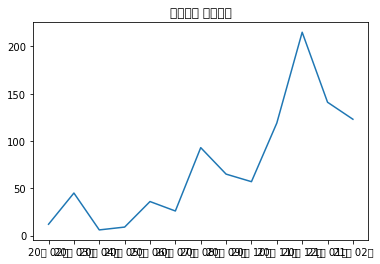

<Figure size 10800x14400 with 0 Axes>

In [44]:

plt.plot(cls_plot['month'],cls_plot['count'])
plt.title('집단감염 발생통계')
plt.figure(figsize=(150,200))
plt.show()
